In [17]:
"""
write this in the Terminal:
conda install -c anaconda pandas-datareader

When asked:
The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda
  qt                                              pkgs/main --> anaconda
Proceed ([y]/n)?

Press y

Install dash

jupyter nbextension enable --py widgetsnbextension

jupyter labextension install @jupyter-widgets/jupyterlab-manager

"""

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader as web
import numpy as np
import bs4 as bs
import pickle
import requests
import os
import pickle
import numpy as np
import dash
import dash_core_components as dcc
import dash_html_components as html
from scipy.stats import norm # normal distribution
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
style.use("ggplot")

"""The purpose of the code below is to first get the tickers for each of the companites on the S&P500 index list, which we later on will
use to append all the historic data to the appropriate ticker. We use *requests.get* to access the data from Wikipedia, which is the list of tickers, after which we use *BeautifulSoup* to then read the HTML format of the website, and make a table. The *soup.find* command is used to specify where exactly in the HTML the table we want is located. 

We make an empty list, and use a for loop to read all entries in the column of the tickers and append each of these to the list we made (called tickers). 

We save it as a pickle as we want to access this data later on, and fast. We called this *"sp500tickers.pickle"*. """



/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



'The purpose of the code below is to first get the tickers for each of the companites on the S&P500 index list, which we later on will\nuse to append all the historic data to the appropriate ticker. We use *requests.get* to access the data from Wikipedia, which is the list of tickers, after which we use *BeautifulSoup* to then read the HTML format of the website, and make a table. The *soup.find* command is used to specify where exactly in the HTML the table we want is located. \n\nWe make an empty list, and use a for loop to read all entries in the column of the tickers and append each of these to the list we made (called tickers). \n\nWe save it as a pickle as we want to access this data later on, and fast. We called this *"sp500tickers.pickle"*. '

The purpose of the code below is to first get the tickers for each of the companites on the S&P500 index list, which we later on will
use to append all the historic data to the appropriate ticker. We use *requests.get* to access the data from Wikipedia, which is the list of tickers, after which we use *BeautifulSoup* to then read the HTML format of the website, and make a table. The *soup.find* command is used to specify where exactly in the HTML the table we want is located. 

We make an empty list, and use a for loop to read all entries in the column of the tickers and append each of these to the list we made (called tickers). 

We save it as a pickle as we want to access this data later on, and fast. We called this *"sp500tickers.pickle"*. 



In [2]:
#Automating S&P500 - From Yahoo Finance - Close price adjusted for splits, and Adj. Close price is adjusted for both dividends and splits.
def save_sp500_tickers():
    resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find("table", {"class": "wikitable sortable"})
    tickers = []
    for row in table.findAll("tr")[1:]:
        ticker = row.findAll("td")[0].text.replace(".","-")
        ticker = ticker[:-1]
        tickers.append(ticker)

    df_tickers = pd.DataFrame(tickers)
    df_tickers.to_csv("tickers.csv")

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    
        print(tickers)

        return(tickers)
    
save_sp500_tickers()

df_tickers = pd.read_csv("tickers.csv", index_col= 0)
df_tickers.columns = ["Ticker"]
df_tickers.head()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CS

,Ticker
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN


Next, we need data for each ticker we have in the list. We get this from yahoo, and using the *DataReader* from pandas. 

Remember we saved the tickers as a pickle file, which we will now open and use to append the data to. Also, we make a separate folder for all of the CSV files we will get (505!). We define appropriate start and end dates for the data we want. 

We then create a for loop, and save each CSV file with price data in the stock_dfs folder. 

In [3]:

def get_names():
    resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find("table", {"class": "wikitable sortable"})
    names = []
    for row in table.findAll("tr")[1:]:
        name = row.findAll("td")[1].text.replace(".","-")
        names.append(name)

    df_names = pd.DataFrame(names)
    df_names.to_csv("names.csv")

    print(names)

get_names()

df_names = pd.read_csv("names.csv", index_col= 0)
df_names.columns = ["Name"]
df_names.head()


def get_sectors():
    resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find("table", {"class": "wikitable sortable"})
    sectors = []
    for row in table.findAll("tr")[1:]:
        sector = row.findAll("td")[3].text.replace(".","-")
        sectors.append(sector)

    df_sectors = pd.DataFrame(sectors)
    df_sectors.to_csv("sectors.csv")

    print(sectors)

get_sectors()

df_sectors = pd.read_csv("sectors.csv", index_col= 0)
df_sectors.columns = ["Sector"]
df_sectors.head()

df_names_and_sector = df_names.join(df_sectors, how = "right")
df_names_and_sector.head()

df_tickers_names_sectors = df_tickers.join(df_names_and_sector, how = "right")
df_tickers_names_sectors.head()
#df_tickers_names_sectors.set_index("Ticker", inplace=True)
#df_tickers_names_sectors.head()
df_tickers_names_sectors.values.tolist

with open ("tickers_names_sectors.pickle", "wb") as f:
    pickle.dump(df_tickers_names_sectors, f)

['3M Company', 'Abbott Laboratories', 'AbbVie Inc-', 'ABIOMED Inc', 'Accenture plc', 'Activision Blizzard', 'Adobe Systems Inc', 'Advanced Micro Devices Inc', 'Advance Auto Parts', 'AES Corp', 'Affiliated Managers Group Inc', 'AFLAC Inc', 'Agilent Technologies Inc', 'Air Products & Chemicals Inc', 'Akamai Technologies Inc', 'Alaska Air Group Inc', 'Albemarle Corp', 'Alexandria Real Estate Equities', 'Alexion Pharmaceuticals', 'Align Technology', 'Allegion', 'Allergan, Plc', 'Alliance Data Systems', 'Alliant Energy Corp', 'Allstate Corp', 'Alphabet Inc Class A', 'Alphabet Inc Class C', 'Altria Group Inc', 'Amazon-com Inc-', 'Ameren Corp', 'American Airlines Group', 'American Electric Power', 'American Express Co', 'American International Group', 'American Tower Corp-', 'American Water Works Company Inc', 'Ameriprise Financial', 'AmerisourceBergen Corp', 'AMETEK Inc-', 'Amgen Inc-', 'Amphenol Corp', 'Anadarko Petroleum Corp', 'Analog Devices, Inc-', 'ANSYS', 'Anthem Inc-', 'Aon plc', 'A-

['Industrials', 'Health Care', 'Health Care', 'Health Care', 'Information Technology', 'Communication Services', 'Information Technology', 'Information Technology', 'Consumer Discretionary', 'Utilities', 'Financials', 'Financials', 'Health Care', 'Materials', 'Information Technology', 'Industrials', 'Materials', 'Real Estate', 'Health Care', 'Health Care', 'Industrials', 'Health Care', 'Information Technology', 'Utilities', 'Financials', 'Communication Services', 'Communication Services', 'Consumer Staples', 'Consumer Discretionary', 'Utilities', 'Industrials', 'Utilities', 'Financials', 'Financials', 'Real Estate', 'Utilities', 'Financials', 'Health Care', 'Industrials', 'Health Care', 'Information Technology', 'Energy', 'Information Technology', 'Information Technology', 'Health Care', 'Financials', 'Industrials', 'Energy', 'Real Estate', 'Information Technology', 'Information Technology', 'Consumer Discretionary', 'Consumer Staples', 'Industrials', 'Information Technology', 'Financi

In [5]:
#Getting data from Yahoo
def data_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2016, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

data_yahoo()


Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have ANET
Already have AJG
Already have AIZ
Already have A

Furthermore, the data from yahoo and the tickers are not very useful by themselves, so obvisouly we want to compile the data in order to get a dataframe with all tickers and their data. We open the pickle file again, and make an empty dataframe.

We can then compile each ticker with their data. We drop all columns that are not *Adj Close*, and rename *Adj Close* to the ticker name since we do not have any other data than for Adjusted Close price. We choose to only include this, since the Adjusted Close price takes into account payment of dividends of companies, eventual stock splits, and Rights offerings.

For easier comparison, we also index the data by dividing the first observation in each column by the rest of the column. 

We then use the empty data frame made before, and join all the data together into a single data frame. 

We also convert the data frame to a csv file for easy access to it. 

finally, we create a data frame from the CSV file just saved, and index the date. We call this new data frame *df_stocks*.

In [39]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    #Iterating though all DFs

    for count, ticker in enumerate(tickers):
        df = pd.read_csv("stock_dfs/{}.csv".format(ticker))
        df.set_index("Date", inplace=True)
        df.rename(columns = {"Adj Close": ticker}, inplace=True) #Adj Close takes the categories place in the column - Simple rename
        df.drop(["Open","High","Low","Close","Volume"],1, inplace=True)
    
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how="outer")
        
        if count % 100 == 0: #Only print #100, #200, #300, etc.
            print(count)
    print(main_df.head())
    main_df.to_csv("sp500_joined_adj_closes.csv")

compile_data()

data_df = pd.read_csv("sp500_joined_adj_closes.csv")
data_df = data_df.drop(["BHGE", "DWDP", "TPR", "ARNC", "ZBH", "OKE", "EVRG", "COST", "EW", "BBT", "JNJ", "VMC", "LIN", "COTY", "DGX", "ZBH", "FTV", "LW"], axis=1)
data_df.set_index("Date", inplace=True)
print(data_df.head())

0
100
200
300
400
500
                   MMM        ABT       ABBV       ABMD        ACN       ATVI  \
Date                                                                            
2016-01-04  135.163361  39.841354  50.214832  85.239998  95.316299  36.604977   
2016-01-05  135.752548  39.832066  50.005642  85.000000  95.812393  36.137928   
2016-01-06  133.018326  39.497967  50.014351  85.300003  95.625191  35.797367   
2016-01-07  129.777802  38.551361  49.866177  81.919998  92.817101  35.291401   
2016-01-08  129.335922  37.743946  48.506435  84.580002  91.918503  34.746506   

                 ADBE   AMD         AAP       AES    ...            WLTW  \
Date                                                 ...                   
2016-01-04  91.970001  2.77  151.373932  8.105658    ...      118.837708   
2016-01-05  92.339996  2.75  150.339844  8.217405    ...      119.655312   
2016-01-06  91.019997  2.51  146.362579  7.933745    ...      114.083321   
2016-01-07  89.110001  2.28  1

As we want to compare a stock from the S&P500 index by the index itself, we need the index data as a whole by itself. We get this using the same method as earlier. We appened this to the Data frame from the compile function. 

In [40]:
#Get sp500 index data
data_df_indexed = data_df/data_df.iloc[0]*100
print(data_df_indexed)

#First difference of the data
first_difference = data_df_indexed.apply(lambda x: x - x.shift(1))
first_difference = first_difference.fillna(value=0)
first_difference.head() 

#pct. change on the closing prices. 
pct_change = data_df.apply(lambda x: (x - x.shift(1))/x.shift(1)*100)
pct_change = pct_change.fillna(value=0)
pct_change.head() 



                   MMM         ABT        ABBV        ABMD         ACN  \
Date                                                                     
2016-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2016-01-05  100.435908   99.976686   99.583409   99.718445  100.520471   
2016-01-06   98.413006   99.138113   99.600753  100.070396  100.324070   
2016-01-07   96.015519   96.762175   99.305672   96.105115   97.377994   
2016-01-08   95.688596   94.735600   96.597824   99.225720   96.435241   
2016-01-11   95.668163   94.875352   93.525439   99.718445   97.446735   
2016-01-12   95.940615   96.575803   95.191802  103.613329   99.194744   
2016-01-13   94.483023   94.419261   89.771829  100.668700   97.476191   
2016-01-14   96.158529   96.341405   95.700480  103.097137  100.049106   
2016-01-15   94.462601   95.028730  100.576715  102.545760   97.486004   
2016-01-19   94.258256   94.770864   96.454716  101.184892   99.558083   
2016-01-20   93.284279   93.669149  10

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-05,0.435908,-0.023314,-0.416591,-0.281555,0.520471,-1.275916,0.402300,-0.722021,-0.683135,1.378639,...,0.342982,0.688001,1.890367,1.008395,-0.194158,1.484719,-0.027710,-0.249266,-1.085708,1.565449
2016-01-06,-2.014122,-0.838768,0.017416,0.352945,-0.195384,-0.942392,-1.429499,-8.727273,-2.645516,-3.451940,...,-13.026964,-4.656702,-5.180539,1.053796,-1.264610,-1.828749,-1.247589,-0.708038,-2.914454,0.020850
2016-01-07,-2.436149,-2.396593,-0.296264,-3.962491,-2.936559,-1.413417,-2.098436,-9.163347,1.107337,-2.491858,...,-9.999982,-4.192380,-9.406986,0.384196,-2.758612,-3.944760,-2.582803,-3.411649,-3.001975,-3.040421
2016-01-08,-0.340489,-2.094388,-2.726781,3.247075,-0.968138,-1.543989,-1.413985,-6.140345,-2.197132,1.444451,...,-1.455624,1.452817,-4.070427,-1.093496,-2.836878,-2.053386,-0.950999,-1.360730,-1.125401,-1.460468


In [67]:
data_df.reset_index

<bound method DataFrame.reset_index of                    MMM        ABT       ABBV        ABMD         ACN  \
Date                                                                   
2016-01-04  135.163361  39.841354  50.214832   85.239998   95.316299   
2016-01-05  135.752548  39.832066  50.005642   85.000000   95.812393   
2016-01-06  133.018326  39.497967  50.014351   85.300003   95.625191   
2016-01-07  129.777802  38.551361  49.866177   81.919998   92.817101   
2016-01-08  129.335922  37.743946  48.506435   84.580002   91.918503   
2016-01-11  129.308304  37.799625  46.963642   85.000000   92.882622   
2016-01-12  129.676559  38.477108  47.800404   88.320000   94.548759   
2016-01-13  127.706429  37.617912  45.078773   85.809998   92.910698   
2016-01-14  129.971100  38.383720  48.055836   87.879997   95.363106   
2016-01-15  127.678825  37.860733  50.504429   87.410004   92.920052   
2016-01-19  127.402626  37.757996  48.434574   86.250000   94.895081   
2016-01-20  126.086166  3

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,135.163361,39.841354,50.214832,85.239998,95.316299,36.604977,91.970001,2.770000,151.373932,8.105658,...,21.791628,118.837708,64.482521,32.163685,25.023848,42.507366,34.595341,48.128719,25.348028,46.097820
2016-01-05,135.752548,39.832066,50.005642,85.000000,95.812393,36.137928,92.339996,2.750000,150.339844,8.217405,...,21.866369,119.655312,65.701477,32.488022,24.975262,43.138481,34.585754,48.008751,25.072823,46.819458
2016-01-06,133.018326,39.497967,50.014351,85.300003,95.625191,35.797367,91.019997,2.510000,146.362579,7.933745,...,19.017845,114.083321,62.297787,32.830379,24.659422,42.349586,34.154266,47.668831,24.342087,46.829220
2016-01-07,129.777802,38.551361,49.866177,81.919998,92.817101,35.291401,89.110001,2.280000,147.983307,7.736048,...,17.116064,109.300514,56.437443,32.956512,23.979164,40.678997,33.272129,46.042538,23.611343,45.405415
2016-01-08,129.335922,37.743946,48.506435,84.580002,91.918503,34.746506,87.849998,2.140000,144.731918,7.847791,...,16.866919,110.888451,54.140198,32.596134,23.298904,39.843700,32.955711,45.416023,23.345621,44.742283
2016-01-11,129.308304,37.799625,46.963642,85.000000,92.882622,35.233021,89.379997,2.340000,146.213440,7.761833,...,15.521554,109.319527,53.249428,32.857407,22.837297,40.020035,32.677639,45.336040,22.880611,43.474514
2016-01-12,129.676559,38.477108,47.800404,88.320000,94.548759,36.118465,89.820000,2.390000,147.227631,7.521158,...,13.736034,109.871048,52.152359,32.731281,23.153131,40.242775,32.859833,46.369141,22.785707,43.854843
2016-01-13,127.706429,37.617912,45.078773,85.809998,92.910698,33.919445,88.300003,2.250000,141.351257,7.426605,...,11.302747,107.303757,49.198761,32.533066,22.399992,38.897030,32.006443,46.436310,21.722815,42.177494
2016-01-14,129.971100,38.383720,48.055836,87.879997,95.363106,34.444874,89.800003,2.210000,140.516037,7.607112,...,15.189363,108.758537,48.289227,33.073635,22.302809,39.361084,32.188625,47.095554,21.817719,43.035675


In [41]:
I = data_df.columns

In [61]:

def plot():

    data_df_widget = data_df
    
    ax=data_df_widget.columns(x="Date", y=[ticker], figsize=(8,5), fontsize=11, legend="False")
    

    
column_headers_dropdown = widgets.Dropdown()
column_headers_dropdown.values  = {column: column for column in data_df_widget.columns}
column_headers_dropdown

Dropdown(options=(), value=None)

We then want to graph a single stock and compare it to the growth of the index as a whole. We start by making a copy of the data we have, using only *"ATVI"* and the *"S&P500"* data. 

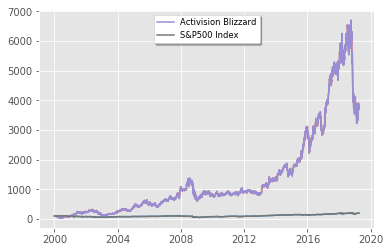

In [19]:
ydata = df_final[["ATVI", "S&P500"]].copy()

plt.plot(ydata)

def plot():

    df = df_final
    
    plt.plot(df["ATVI"], label = "Activision Blizzard")
    plt.plot(df["S&P500"], label = "S&P500 Index")

    plt.legend(loc = "upper center", shadow = True, fontsize = "small", facecolor = "white")

    plt.show()


plot()

On the graph above, we see the growth in the Activision Blizzard stock compared to the S&P500 index. We see that the Activision Blizzard stock has experience a wild growth since its start in 2000. The spike around 2008 is due to the merge between Activision Entertainment and Blizzard Entertainment. The rise since ca. 2013 can be due to the rise in popularity and availability to video games. The eventual drastic fall in the end of the series comes after Blizzcon 2018 where a very unpopular annoucement was made, resulting in t